In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

**Имитация GD и график изменения loss + порог останова tolerance**

* Сохранение `изменённого` вектора через COPY
* Построение графика Loss 

0 1.5625
1 1.1236000000000002
2 0.7569
3 0.4624
4 0.24009999999999998
5 0.08999999999999998
6 0.012099999999999994
7 0.0063999999999999994


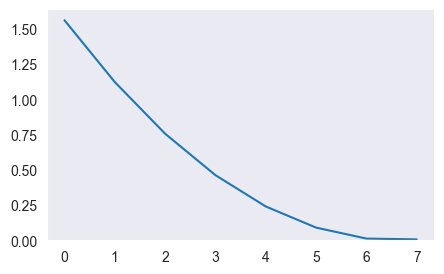

In [3]:
w = np.array([0.9, 0.4, 0.3, 0.7]) # Стартовый вектор Весов
y = np.array([-0.5, -1.,  -1.1, -0.7]) + 0.15  # Целевая
w_res = [w.copy()]  # размещение в итоговый список копии стартового вектора
tolerance = 0.007

def gd(w, y, w_res):
    for i in range(10):  # число итераций
        w -= 0.19  # действие с текущим вектором весов -> аналог w -= learning_rate * 2 * X.T @ (X @ w - Y) / num_objects
        w_res.append(w.copy()) #  Сохранение копий изменённых векторов весов
    w_res = np.array(w_res)  # трансформ списка в ndarray
    
# TODO w_res.T - имитация произведения Вектора весов на Матрицу признаков, loss - ф-ия потерь   
    loss = np.square(w_res.T - y[:, None]).mean(axis=0)  
    for i, j in enumerate(loss):  # Фильтр для останова GD
        print(i, j)
        if j < tolerance:
            return loss[: i + 1]

plt.figure(figsize=(5, 3))
plt.plot(gd(w, y, w_res))
plt.ylim(bottom=0)
plt.grid()
plt.show()

**Вариант без сохранения через COPY**

In [11]:
w = np.array([0.9, 0.4, 0.3, 0.7]) # Стартовый вектор
print(w)
w_res = [w]  # размещение в итоговый список копии стартового вектора
for _ in range(7):  # число итераций
    w -= 0.2  # действие с текущим вектором аналог w -= learning_rate * 2 * X.T @ (X @ w - Y) / num_objects
    w_res.append(w) #  Сохранение копий изменённых векторов
w_res = np.array(w_res)  # трансформ списка в ndarray
print(w_res)

[0.9 0.4 0.3 0.7]
[[-0.5 -1.  -1.1 -0.7]
 [-0.5 -1.  -1.1 -0.7]
 [-0.5 -1.  -1.1 -0.7]
 [-0.5 -1.  -1.1 -0.7]
 [-0.5 -1.  -1.1 -0.7]
 [-0.5 -1.  -1.1 -0.7]
 [-0.5 -1.  -1.1 -0.7]
 [-0.5 -1.  -1.1 -0.7]]


**Вариант с сохранением без COPY**

In [3]:
w = np.array([0.9, 0.4, 0.3, 0.7]) # Стартовый вектор
print(w)
w_res = [w]  
for _ in range(7):  
    w_new = np.array([0.0, 0.0, 0.0, 0.0])
    w -= 0.2 
    # w_new =  w_new + w
    w_new +=  w
    w_res.append(w_new) 
w_res = np.array(w_res)  
print(w_res)

[0.9 0.4 0.3 0.7]
[[-0.5 -1.  -1.1 -0.7]
 [ 0.7  0.2  0.1  0.5]
 [ 0.5  0.  -0.1  0.3]
 [ 0.3 -0.2 -0.3  0.1]
 [ 0.1 -0.4 -0.5 -0.1]
 [-0.1 -0.6 -0.7 -0.3]
 [-0.3 -0.8 -0.9 -0.5]
 [-0.5 -1.  -1.1 -0.7]]


# SGD
* Отличие `стохастического градиентного спуска` заключается в том, что градиент считается по `батчу`. Приведем пример для размера `батча 10`

In [4]:
num_features = 2
num_objects = 3000
batch_size = 10
num_steps = 20

# Генерируем коэффициенты регрессии
w_true = np.random.normal(size=(num_features,))

# Генерируем матрицу признаков
X = np.random.uniform(-5, 5, (num_objects, num_features))

# Генерируем вектор таргетов, добавляя нормальный шум
Y = X @ w_true + np.random.normal(0, 1, num_objects)



# SGD 
*на 5 батчей*

In [10]:
w = np.random.uniform(-2, 2, num_features)
w_list = [w.copy()]
learning_rate = 1e-2

for i in range(2 * batch_size):
    sample_indices = np.random.randint(0, num_objects, batch_size) # Выбираем индексы 20-ти случайных строк 
    X_batch = X[sample_indices, :] # из массива признаков 3000 х 2, выбираем 20 случайных строк(векторов признаков)
    Y_batch = Y[sample_indices] # из вектора Целевой, выбираем 20 случайных значений
    # TODO нормируем результат на размер батча - batch_size
    w -= learning_rate * 2 * X_batch.T @ (X_batch @ w - Y_batch) / batch_size # Подставляем массив X_batch и вектор Y_batch для обновления вектора весов
    w_list.append(w.copy())

w_list = np.array(w_list) # Список обновлённых векторов весов

print('Обновлённые веса с заданным батчем : \n', f'{w}')
print('Начальные Истинные веса, в т.ч. для Генерации Целевой Y : \n', f'{w_true}')
print('Список обновлённых векторов весов : \n', f'{w_list[-1:]}')



Обновлённые веса с заданным батчем : 
 [0.38526859 0.53466441]
Начальные Истинные веса, в т.ч. для Генерации Целевой Y : 
 [0.38163074 0.64074924]
Список обновлённых векторов весов : 
 [[0.38526859 0.53466441]]


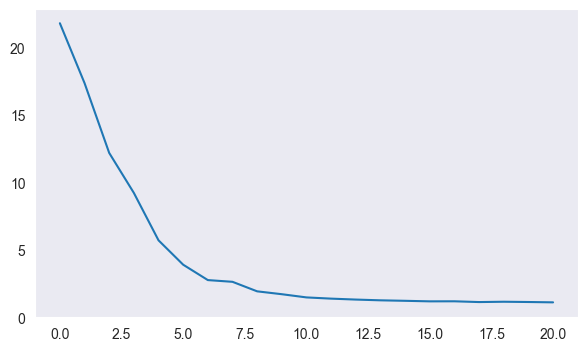

In [11]:
plt.figure(figsize=(7, 4))
plt.plot(np.square(X @ w_list.T - Y[:, None]).mean(axis=0))
plt.ylim(bottom=0)
plt.grid()
plt.show()